In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc
    
GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nlh/'
''' If SSL error _ssl.c:997: 
    pip install --upgrade certifi'''

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [199]:
## Native (non-phosphorylated)

# Options ################################
A = 'b36v10c3'
B = 'b36v15c3'
C = 'b5v10c3'
C_2='HC' 
D = 'b5v15c3'
D_2='HD' 
E = 'b7v15c3'
E_2 ='HE'
F_2 ='HF'

a1 = '310' # b0.36 v0.10
a1_2='La1'
a2 = '315' # b0.36 v0.15
a2_2='La2'
a3 = '320' # b0.36 v0.20
b1 = '553' # b0.50 v0.15
b1_2='Lb1' # b0.50 v0.15 c3.5
b2 = '525' # b0.50 v0.25
b3 = '550' # b0.50 v0.50
g1 = '753' # b0.75 v0.15
g1_2='Lg1' # b0.75 v0.15 c3.5
g2 = '725' # b0.75 v0.25
##########################################
##########################################
titleL = 'p1La1'
titleH = 'p1HE'
titleL30 = 'p1aE'
titleL80 = '2b1E80'
thresh = 4.00e-03
##########################################
##########################################

labs =  ['0015', '003', '005', '007', '010', '020', '050']#, '150']
labs_mod = ['002']+labs[1:]
H_list = ['ph{}_c'.format(titleH)+i+'.dat' for i in labs_mod]
L_list = ['ph{}_c'.format(titleL)+i+'.dat' for i in labs_mod]
L30_list = ['ph{}_c'.format(titleL30)+i+'.dat' for i in labs_mod]
L80_list = ['ph{}_c'.format(titleL80)+i+'.dat' for i in labs_mod]
H_list = [GIT+i for i in H_list]
L_list = [GIT+i for i in L_list]
L30_list = [GIT+i for i in L30_list]
L80_list = [GIT+i for i in L80_list]
algs = ['thresh', 'maxpt', 'norm']

Hs = pd.DataFrame([np.zeros(len(H_list))]*5, index=['cs', 'kapd']+algs).transpose()
Hs.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Hs.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Hs.cs]
for algind in range(1):
    for i in range(len(H_list)): 
      Hs.iloc[i, algind+2] = tjy.H_find(H_list[i], alg=algs[algind], thresh=thresh)
print(Hs)
Ls = pd.DataFrame([np.zeros(len(L_list))]*5, index=['cs', 'kapd']+algs).transpose()
Ls.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Ls.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Ls.cs]
for algind in range(1):
    for i in range(len(L_list)): 
      Ls.iloc[i, algind+2] = tjy.H_find(L_list[i], alg=algs[algind], thresh=thresh)
print(Ls)
L30 = pd.DataFrame([np.zeros(len(L30_list))]*5, index=['cs', 'kapd']+algs).transpose()
L30.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
L30.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in L30.cs]
for algind in range(1):
    for i in range(len(L30_list)): 
      L30.iloc[i, algind+2] = tjy.H_find(L30_list[i], alg=algs[algind], thresh=thresh)
print(L30)
# L80 = pd.DataFrame([np.zeros(len(L80_list))]*5, index=['cs', 'kapd']+algs).transpose()
# L80.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
# L80.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in L80.cs]
# for algind in range(1):
#     for i in range(len(L80_list)): 
#       L80.iloc[i, algind+2] = tjy.H_find(L80_list[i], alg=algs[algind], thresh=thresh)
# print(L80)

     cs      kapd    thresh  maxpt  norm
0   1.5  7.871251  4.907251    0.0   0.0
1   3.0  5.565815  4.896328    0.0   0.0
2   5.0  4.311262  4.873061    0.0   0.0
3   7.0  3.643681  4.861784    0.0   0.0
4  10.0  3.048522  4.848377    0.0   0.0
5  20.0  2.155631  4.817632    0.0   0.0
6  50.0  1.363341  4.778199    0.0   0.0
     cs      kapd     thresh  maxpt  norm
0   1.5  7.871251  21.366990    0.0   0.0
1   3.0  5.565815  21.149450    0.0   0.0
2   5.0  4.311262  20.501155    0.0   0.0
3   7.0  3.643681  19.751111    0.0   0.0
4  10.0  3.048522  18.654616    0.0   0.0
5  20.0  2.155631  15.842855    0.0   0.0
6  50.0  1.363341  12.240129    0.0   0.0
     cs      kapd     thresh  maxpt  norm
0   1.5  7.871251  11.816430    0.0   0.0
1   3.0  5.565815  11.976982    0.0   0.0
2   5.0  4.311262  11.654498    0.0   0.0
3   7.0  3.643681  11.186469    0.0   0.0
4  10.0  3.048522  10.465140    0.0   0.0
5  20.0  2.155631   8.196788    0.0   0.0
6  50.0  1.363341   4.409887    0.0   0.0


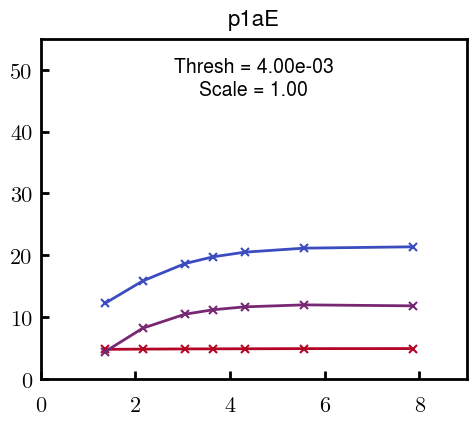

In [200]:
#import EAD_np
import EAD_np
dfs = {'LSA00':  [EAD_np.LSA00_1, EAD_np.LSA00_2],
       'LSA25':  [EAD_np.LSA25_1, EAD_np.LSA25_2],
       'LSA50':  [EAD_np.LSA50_1, EAD_np.LSA50_2],
       'LSA75':  [EAD_np.LSA75_1, EAD_np.LSA75_2],
       'LSA100': [EAD_np.LSA100_1, EAD_np.LSA100_2]}

# EAD 20220705 Data
EADcs = [1.6, 3.1, 4.6, 6.6, 11.6, 51.6]
EADcs2 = [1.6, 3.1, 4.6, 6.6, 11.6, 21.6, 51.6]
EADcs3 = [1.6, 4.6, 11.6, 51.6]

EADdeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs]
EADdeb2 = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs2]
EADdeb3 = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs3]

EADL_1 = [37.3503292, 35.66635517, 31.60367327, 30.51213493, 19.55555023, 17.70957033]
EADL_2 = [40.65413833, 36.88049873, 39.54620197, 42.27351153, 25.3742907, 15.54885597]
EADL_3, EADL_3n = [42.18774154, 34.42681131, 36.94680269, 21.60936372], [42.18774154, np.nan, 34.42681131, np.nan, 36.94680269, 21.60936372]
EADL_4, EADL_4n = [43.32828107, 37.47239234, 30.41876754, 17.88987109], [43.32828107, np.nan, 37.47239234, np.nan, 30.41876754, 17.88987109]
EADL_a = np.nanmean(np.array([EADL_1, EADL_2, EADL_3n, EADL_4n]), axis=0)

EADH_1 = [3.982809973, 6.14174949, 4.122060533, 8.4279967, 7.393286337, 5.624564563]
EADH_2 = [5.065632817, 8.7720967, 4.13424014, 8.122542053, 5.0094431, 7.20754611]
EADH_3 = [4.300001733, 3.849165782, 4.263458652, 3.577032201]
EADH_a = np.mean(np.array([EADH_1, EADH_2]), axis=0)

EAD80_1 = [39.0904899, 31.6319996, 31.4951879, 22.2966476, 22.8323448, 15.1019332, 11.9286194]
EAD80_2 = [36.2127833, 30.0737538, 30.1231263, 28.5908979, 24.2522966, 17.5124717, 13.271754]
EAD80_a = np.mean(np.array([EAD80_1, EAD80_2]), axis=0)
EAD30_1 = [8.40892663, 13.392325, 15.4668739, 18.8685071, 12.7833741, 10.7519308, 8.06502549]
EAD30_2 = [16.5840688, 14.8418816, 16.1486509, 16.0967578, 13.6481441, 11.375515, 10.2151375]
EAD30_a = np.mean(np.array([EAD30_1, EAD30_2]), axis=0)

## Figure Initialization
f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)
for i in [0]:
    # plt.plot(EADdeb, EADL_1, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="Pure L")
    # plt.plot(EADdeb, EADL_2, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    # plt.plot(EADdeb3, EADL_3, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    # plt.plot(EADdeb3, EADL_4, 'o', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
    # plt.plot(EADdeb, EADL_a, ':', color=tjy.lighten_color(cool_blue,1.0), label="_Pure L")
    # plt.plot(EADdeb, EADH_1, 'o', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="Pure H")
    # plt.plot(EADdeb, EADH_2, 'o', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="_Pure H")
    # plt.plot(EADdeb, EADH_a, ':', color=tjy.lighten_color(warm_red,1.0), label="_Pure H")
    # plt.plot(EADdeb2, EAD80_1, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="80% L")
    # plt.plot(EADdeb2, EAD80_2, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_80% L")
    # plt.plot(EADdeb2, EAD80_a, ':', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_80% L")
    # plt.plot(EADdeb2, EAD30_1, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="30% L")
    # plt.plot(EADdeb2, EAD30_2, 'o', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_30% L")
    # plt.plot(EADdeb2, EAD30_a, ':', color=tjy.lighten_color(mix_purp,0.5), mew=1.5, markerfacecolor='w',label="_30% L")
    plt.xlim(0, 9)
    plt.ylim(0, 55)
    plt.xticks([0, 2, 4, 6, 8])
    
# for name, files in dfs.items():
#     deb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in files[0].cs]
#     data = files[0].iloc[:,1:]
#     for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
#     avg = data.mean(axis=1)
#     plt.plot(deb, avg, 'o--', markerfacecolor='w', label=name)
#     plt.title(r"Non-phosphorylated L/H", fontsize=18)
#     plt.ylabel('Height' ' [nm]')
#     plt.xlabel(r'Screening Length $\kappa_D^{-1}$'+' [nm]')
    
## Data Plotting 
text_loc  = (0.50, 0.92)
text_loc2 = (0.50, 0.85)
text_kw = {'fontsize':  14,
           'ha':        'center',
           'va':        'center', 
           'bbox':      dict(boxstyle='square', facecolor='none', edgecolor='none')}
L_kw = {'color': cool_blue, 'marker': 'x'}
Lx_kw= {'color': mix_purp,  'marker': 'x'}
H_kw = {'color': warm_red,  'marker': 'x'}

plt.text(*text_loc,'Thresh = {:.2e}'.format(thresh), transform=plt.gca().transAxes, **text_kw)
scale = 1.00
plt.plot(Ls.kapd,  scale*Ls.thresh, label= 'Calc L', **L_kw)
plt.plot(Hs.kapd,  scale*Hs.thresh, label= 'Calc H', **H_kw)
plt.plot(L30.kapd, scale*L30.thresh, label= 'Calc L30', **Lx_kw)
plt.text(*text_loc2,'Scale = {:.2f}'.format(scale), transform=plt.gca().transAxes, **text_kw)
# plt.plot(L80.kapd, scale*L80.thresh, label= 'Calc L80', **Lx_kw)

# leg = axs.legend(bbox_to_anchor=(1.00,0.95), loc='upper left', fontsize=14, borderpad=0)
axs.set_title(titleL30,fontsize=16)
# axs.set_title(titleL30,fontsize=16)
tjy.ticks()
plt.show()

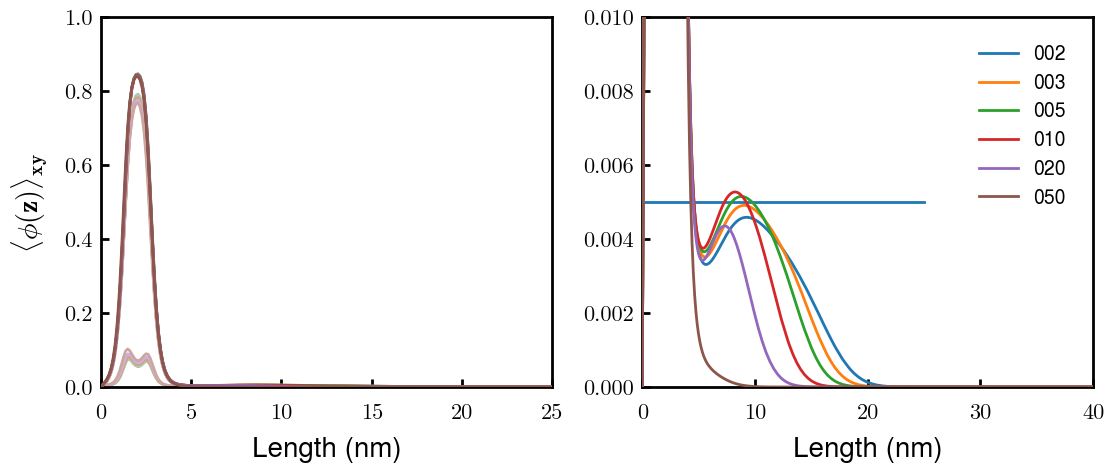

In [198]:
# labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
# labs_mod = ['002']+labs[1:]
# thresh = 3.0e-03
labs_mod = ['002', '003', '005', '010', '020', '050']
labs = labs_mod
read_list = [GIT+"php1aE_c"+i+".dat" for i in labs_mod]
block_Ni = [[4,7]]*len(read_list)

fig, ax = tjy.plot_pha(read_list, x1_end=25, x2_end=40, y2_end=0.010, #block2=3,
                       block_Ni=block_Ni, labs=labs, double=True, show=False)
plt.sca(ax[1])
plt.plot([0,25], np.ones(2)*thresh)
plt.show()

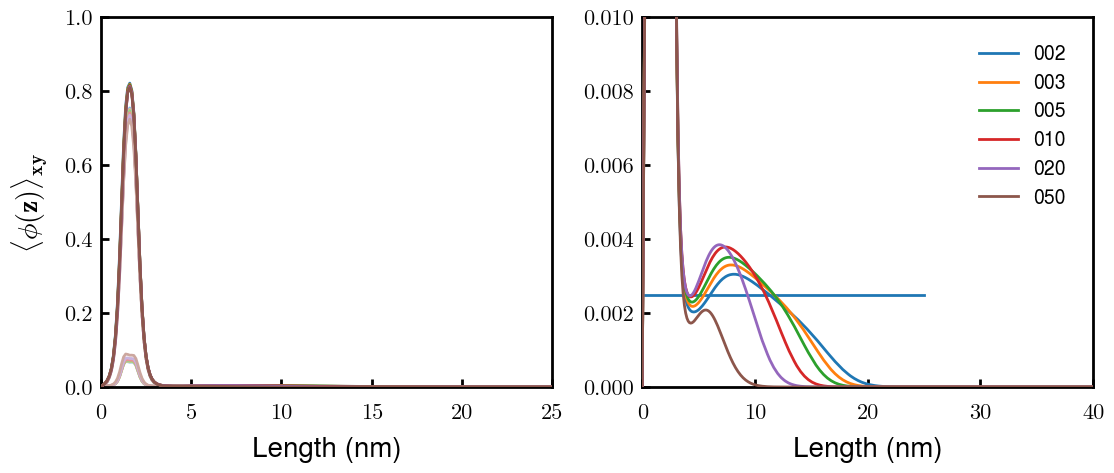

In [8]:
# labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
# labs_mod = ['002']+labs[1:]
thresh = 2.5e-03
labs_mod = ['002', '003', '005', '010', '020', '050']
labs = labs_mod
read_list = [GIT+"ph2a1E_c"+i+".dat" for i in labs_mod]
block_Ni = [[4,7]]*len(read_list)

fig, ax = tjy.plot_pha(read_list, x1_end=25, x2_end=40, y2_end=0.010, #block2=3,
                       block_Ni=block_Ni, labs=labs, double=True, show=False)
plt.sca(ax[1])
plt.plot([0,25], np.ones(2)*thresh)
plt.show()

In [17]:
## Native (non-phosphorylated)

# Options ################################
L1 = '253'
L2 = '753'
L3 = '553'
L4 = '315'
L5 = '506'
L6 = '125'
L0 = '150'
H  = 'b5v15c3'
##########################################
##########################################
titleL = L6
titleH = H
titleL30 = 'v15L73'
titleL80 = 'v15L78'
thresh = 5.00e-03
##########################################
##########################################

labs =  ['0015', '003', '005', '007', '010', '020', '050']#, '150']
labs_mod = ['002']+labs[1:]
H_list = ['ph{}_c'.format(titleH)+i+'.dat' for i in labs_mod]
L_list = ['ph{}_c'.format(titleL)+i+'.dat' for i in labs_mod]
L30_list = ['ph{}_c'.format(titleL30)+i+'.dat' for i in labs_mod]
L80_list = ['ph{}_c'.format(titleL80)+i+'.dat' for i in labs_mod]
H_list = [GIT+i for i in H_list]
L_list = [GIT+i for i in L_list]
L30_list = [GIT+i for i in L30_list]
L80_list = [GIT+i for i in L80_list]
algs = ['thresh', 'maxpt', 'norm']

Hs = pd.DataFrame([np.zeros(len(H_list))]*5, index=['cs', 'kapd']+algs).transpose()
Hs.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Hs.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Hs.cs]
for algind in range(1):
    for i in range(len(H_list)): 
      Hs.iloc[i, algind+2] = tjy.H_find(H_list[i], alg=algs[algind], thresh=thresh)
print(Hs)
Ls = pd.DataFrame([np.zeros(len(L_list))]*5, index=['cs', 'kapd']+algs).transpose()
Ls.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
Ls.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in Ls.cs]
for algind in range(1):
    for i in range(len(L_list)): 
      Ls.iloc[i, algind+2] = tjy.H_find(L_list[i], alg=algs[algind], thresh=thresh)
print(Ls)
L30 = pd.DataFrame([np.zeros(len(L30_list))]*5, index=['cs', 'kapd']+algs).transpose()
L30.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
L30.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in L30.cs]
for algind in range(1):
    for i in range(len(L30_list)): 
      L30.iloc[i, algind+2] = tjy.H_find(L30_list[i], alg=algs[algind], thresh=thresh)
print(L30)
L80 = pd.DataFrame([np.zeros(len(L80_list))]*5, index=['cs', 'kapd']+algs).transpose()
L80.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
L80.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in L80.cs]
for algind in range(1):
    for i in range(len(L80_list)): 
      L80.iloc[i, algind+2] = tjy.H_find(L80_list[i], alg=algs[algind], thresh=thresh)
print(L80)

     cs      kapd    thresh  maxpt  norm
0   1.5  7.871251  3.980302    0.0   0.0
1   3.0  5.565815  3.969454    0.0   0.0
2   5.0  4.311262  3.961286    0.0   0.0
3   7.0  3.643681  3.953951    0.0   0.0
4  10.0  3.048522  3.944248    0.0   0.0
5  20.0  2.155631  3.913282    0.0   0.0
6  50.0  1.363341  3.849587    0.0   0.0
     cs      kapd     thresh  maxpt  norm
0   1.5  7.871251  24.726623    0.0   0.0
1   3.0  5.565815  24.463889    0.0   0.0
2   5.0  4.311262   0.000000    0.0   0.0
3   7.0  3.643681  24.086840    0.0   0.0
4  10.0  3.048522   0.000000    0.0   0.0
5  20.0  2.155631  22.005764    0.0   0.0
6  50.0  1.363341  18.046373    0.0   0.0
     cs      kapd     thresh  maxpt  norm
0   1.5  7.871251  16.411977    0.0   0.0
1   3.0  5.565815  16.542067    0.0   0.0
2   5.0  4.311262  16.579108    0.0   0.0
3   7.0  3.643681  16.585427    0.0   0.0
4  10.0  3.048522  16.453961    0.0   0.0
5  20.0  2.155631  15.102157    0.0   0.0
6  50.0  1.363341  12.135122    0.0   0.0


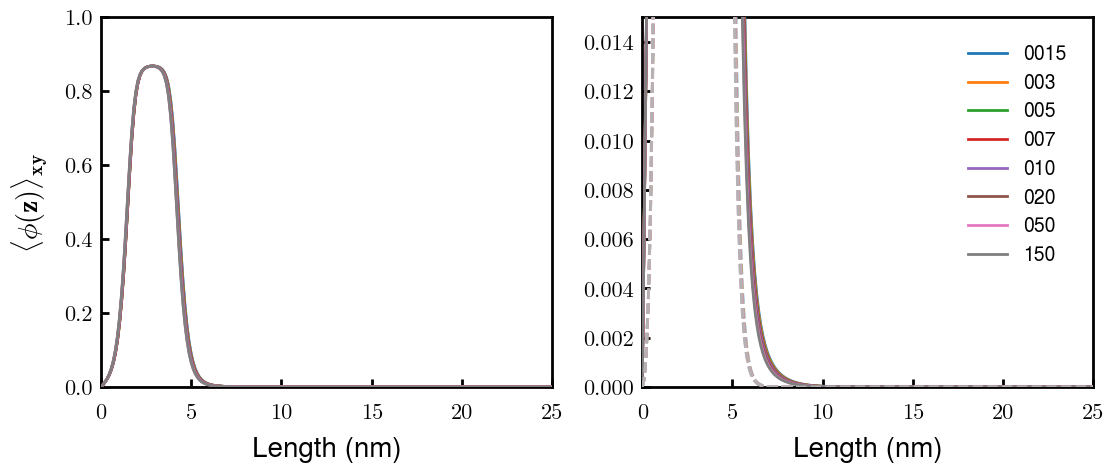

In [114]:
labs =  ['0015', '003', '005', '007', '010', '020', '050', '150']
labs_mod = ['002']+labs[1:]
read_list = [GIT+"php2HE_c"+i+".dat" for i in labs_mod]
block_Ni = [[7, 1]]*len(read_list)

fig, ax = tjy.plot_pha(read_list, x1_end=25, x2_end=25, y2_end=0.015, block2=3,
                       block_Ni=block_Ni, labs=labs, double=True, show=False)


In [26]:
## Phosphorylated

# Options ################################
pL1 = '623'
pL2 = 'pH2'
pL3 = 'pH3'
pL4 = ''
pH  = 'pH1'
##########################################
##########################################
titleL = pL2
titleH = pH
titleL30 = pL3
titleL80 = ''
thresh = 1.00e-06
##########################################
##########################################

labs =  ['0015', '003', '005', '007', '010', '020', '050']#, '150']
labs_mod = ['002']+labs[1:]
pH_list = ['ph{}_c'.format(titleH)+i+'.dat' for i in labs_mod]
pL_list = ['ph{}_c'.format(titleL)+i+'.dat' for i in labs_mod]
pL30_list = ['ph{}_c'.format(titleL30)+i+'.dat' for i in labs_mod]
pL80_list = ['ph{}_c'.format(titleL80)+i+'.dat' for i in labs_mod]
pH_list = [GIT+i for i in pH_list]
pL_list = [GIT+i for i in pL_list]
pL30_list = [GIT+i for i in pL30_list]
pL80_list = [GIT+i for i in pL80_list]
algs = ['thresh', 'maxpt', 'norm']

pHs = pd.DataFrame([np.zeros(len(pH_list))]*5, index=['cs', 'kapd']+algs).transpose()
pHs.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
pHs.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in pHs.cs]
for algind in range(1):
    for i in range(len(pH_list)): 
        pHs.iloc[i, algind+2] = tjy.H_find(pH_list[i], alg=algs[algind], thresh=thresh)
print(pHs)
pLs = pd.DataFrame([np.zeros(len(pL_list))]*5, index=['cs', 'kapd']+algs).transpose()
pLs.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
pLs.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in pLs.cs]
for algind in range(1):
    for i in range(len(pL_list)): 
        pLs.iloc[i, algind+2] = tjy.H_find(pL_list[i], alg=algs[algind], thresh=thresh)
print(pLs)
pL30 = pd.DataFrame([np.zeros(len(pL30_list))]*5, index=['cs', 'kapd']+algs).transpose()
pL30.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
pL30.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in pL30.cs]
for algind in range(1):
    for i in range(len(pL30_list)): 
        pL30.iloc[i, algind+2] = tjy.H_find(pL30_list[i], alg=algs[algind], thresh=thresh)
print(pL30)
# pL80 = pd.DataFrame([np.zeros(len(pL80_list))]*5, index=['cs', 'kapd']+algs).transpose()
# pL80.iloc[:,0] = [1.5]+[float(i) for i in labs[1:]]
# pL80.iloc[:,1] = [1/tjy.Kap_D(i*1e-3)*1e9 for i in pL80.cs]
# for algind in range(1):
#     for i in range(len(pL80_list)): 
#         pL80.iloc[i, algind+2] = tjy.H_find(pL80_list[i], alg=algs[algind], thresh=thresh)
# print(pL80)

     cs      kapd     thresh  maxpt  norm
0   1.5  7.871251   0.000000    0.0   0.0
1   3.0  5.565815   0.000000    0.0   0.0
2   5.0  4.311262  53.998494    0.0   0.0
3   7.0  3.643681  48.570159    0.0   0.0
4  10.0  3.048522  40.393493    0.0   0.0
5  20.0  2.155631  15.447624    0.0   0.0
6  50.0  1.363341   9.960479    0.0   0.0
     cs      kapd     thresh  maxpt  norm
0   1.5  7.871251   0.000000    0.0   0.0
1   3.0  5.565815   0.000000    0.0   0.0
2   5.0  4.311262  56.146393    0.0   0.0
3   7.0  3.643681  51.135968    0.0   0.0
4  10.0  3.048522  44.596437    0.0   0.0
5  20.0  2.155631  19.921512    0.0   0.0
6  50.0  1.363341   9.953078    0.0   0.0
     cs      kapd     thresh  maxpt  norm
0   1.5  7.871251   0.000000    0.0   0.0
1   3.0  5.565815  57.595898    0.0   0.0
2   5.0  4.311262  49.461500    0.0   0.0
3   7.0  3.643681  42.054304    0.0   0.0
4  10.0  3.048522  22.539892    0.0   0.0
5  20.0  2.155631  11.900518    0.0   0.0
6  50.0  1.363341   9.822522    0.

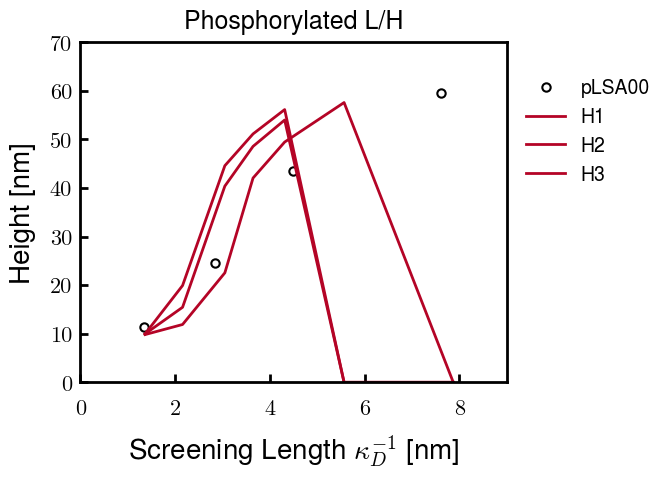

In [29]:
## Data import
import EAD_p
dfs = {'pLSA00': [EAD_p.pLSA00_1, EAD_p.pLSA00_2],}
       # 'pLSA25': [EAD_p.pLSA25_1, EAD_p.pLSA25_2],
       # 'pLSA50': [EAD_p.pLSA50_1, EAD_p.pLSA50_2],
       # 'pLSA75': [EAD_p.pLSA75_1, EAD_p.pLSA75_2],
       # 'pLSA100': [EAD_p.pLSA100_1, EAD_p.pLSA100_2]}

## Figure Initialization
f, axs = plt.subplots(1,1, figsize=(5.5,4))
plt.subplots_adjust(hspace=0.0, top=0.96)

for name, files in dfs.items():
    deb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in files[0].cs]
    data = files[0].iloc[:,1:]
    for file in files[1:]: data = pd.concat([data, file.iloc[:,1:]], axis=1)
    avg = data.mean(axis=1)
    plt.plot(deb, avg, 'o', markerfacecolor='w', markeredgecolor='k', label=name)
    plt.xlim(0, 9)
    plt.ylim(0, 70)
    plt.title(r"Phosphorylated L/H", fontsize=18)
    plt.ylabel('Height' ' [nm]')
    plt.xlabel(r'Screening Length $\kappa_D^{-1}$'+' [nm]')
    plt.xticks([0, 2, 4, 6, 8])

## Data Plotting 
text_loc = (0.50, 0.92)
text_kw = {'fontsize':  14,
           'ha':        'center',
           'va':        'center', 
           'bbox':      dict(boxstyle='square', facecolor='none', edgecolor='none')}
L_kw = {'color': cool_blue, 'marker': 'x'}
Lx_kw = {'color': mix_purp, 'marker': 'x'}
H_kw = {'color': warm_red}#,  'marker': 'x'}

# plt.text(*text_loc,'Thresh = {:.2e}'.format(thresh), transform=plt.gca().transAxes, **text_kw)
plt.plot(pHs.kapd, pHs.thresh, label= 'H1', **H_kw)
plt.plot(pLs.kapd, pLs.thresh, label= 'H2', **H_kw)
plt.plot(pL30.kapd, pL30.thresh, label= 'H3', **H_kw)
# plt.plot(pL80.kapd, pL80.thresh, label= 'Calc pL80', **Lx_kw)

leg = axs.legend(bbox_to_anchor=(1.00,0.95), loc='upper left', fontsize=14, borderpad=0)
tjy.ticks()
plt.show()